# Data Pre-Processing and augmentation notebook (adapted from a notebook written by Dr. Chris Pattison)

The data is always the most important part of any AI method. If you understand your data well you will come up with a model which is both efficient and accurate.

Efficiency comes from both a good model but also and **most importantly** from the appropriate data scaling.

Accuracy comes from both a well chosen model and, much more subtle but even more important, understanding the limits of your training and data. Are you trying to apply your model to data where it is not valid? Have you minimised the loss or over- or under-trained?

## Overview:
1. Basics of saving and loading data.
2. Getting data from the internet.
3. Loading, inspecting, and plotting data.
4. Data augmentation

The purpose of this notebook is purely to examine the data, understand it better, and augment the images before training a model. The training aspect is an advanced task at the end of the notebook, and will be covered in more detail in future lectures.

## 1. Basics of saving and loading data

To be able to test and augment data, we first need to be able to read some data. This first task is a simple introduction to this.

### TASK

1- Create a function that writes the following ridiculous sentences (or come up with your own) to a text file.
- The complex houses married and single soldiers and their families.
- One morning I shot an elephant in my pyjamas. How he got into my pyjamas I’ll never know.
- Police police police police police police police police.

2- Read in the text file.

3- Print a random sentence from the text file.

In [1]:
file = open("mytext.txt", "w")

with open("mytext.txt", "w") as file:
    file.write("The complex houses married and single soldiers and their families.\n")
    file.write("One morning I shot an elephant in my pyjamas. How he got into my pyjamas I'll never know.\n")
    file.write("Police police police police police police police police.")

In [2]:
with open("mytext.txt", "r") as file:
    lines = file.readlines()

In [3]:
import random
print(lines[random.randrange(0, len(lines))])

Police police police police police police police police.


## 2. Loading, inspecting, and plotting data.

Before training a model on the data, we want to understand the data ourselves and check there are no anomalies we need to be aware of.

We will be first working with the Iris dataset.  This is one of the standard "toy" datasets used to teach various machine learning techniques.  We have made a version of this dataset available on a shared google drive: https://drive.google.com/drive/folders/15NEfG92kk9UEs667tpHh76HociSurk7e?usp=drive_link

You can download this folder locally and read the files into python, or access them directly with there sharing URLs listed below: 

- "iris.names" (txt file with info about the dataset): https://drive.google.com/uc?id=1-YcdIrMCCV_AdTK2BD-h1FPZnE6htFhg

- "iris.datafile" (CSV file): https://drive.google.com/uc?id=1-ZTs3yYFl7eOPjOFKc9vL22pDMfApx72


Note: you can get construct the URL for any of the files in this shared drive by adding the file ID number to the end of the URL `https://drive.google.com/uc?id=`.  To get the file ID number right click any of the files in the drive, go to `Share -> Copy link`.  This URL has the structure `https://drive.google.com/file/d/<file ID>/view?usp=drive_link`, just extract the file ID from it.


### Google colab (optional)

If you are using Google colab you can mount the mount the Google Drive linked on Moodle, and read in the iris dataset. It may be useful to add the folder to your Drive to link easily to it in paths below (eg using Add Shortcut -> My Drive).  From there you can read in the data as if you had downloaded it locally.  The code below can be used to mount the folder.

```python
import os
from google.colab import drive

drive.mount('/content/drive')
os.listdir('/content/drive/MyDrive/student_data/iris')
```

### TASKS


- Print the content of the "iris.names" file to read about the dataset

In [4]:
from urllib.request import urlopen 
# Only needed if you are *not* on colab
# can be used to read in "iris.names"
# Note you might want to use ".decode('utf-8')" on the result to get it to print nice

In [5]:
with open("iris.names", "r") as file:
    contents = file.read()
    print(contents)

1. Title: Iris Plants Database
	Updated Sept 21 by C.Blake - Added discrepency information

2. Sources:
     (a) Creator: R.A. Fisher
     (b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
     (c) Date: July, 1988

3. Past Usage:
   - Publications: too many to mention!!!  Here are a few.
   1. Fisher,R.A. "The use of multiple measurements in taxonomic problems"
      Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions
      to Mathematical Statistics" (John Wiley, NY, 1950).
   2. Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis.
      (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
   3. Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
      Structure and Classification Rule for Recognition in Partially Exposed
      Environments".  IEEE Transactions on Pattern Analysis and Machine
      Intelligence, Vol. PAMI-2, No. 1, 67-71.
      -- Results:
         -- very low misclassification rates (0% for t

-  Load the "iris.datafile" as a Pandas dataframe and look at the structure of the data

Note: the "iris.datafile" does not have a "header" included in the file, you will want to provide the column names to Pandas when you read in the CSV file (column descriptions can be found in the "iris.names" file you read in above).

- Group the data by iris class name and print the first 5 lines and use Panda's "describe" method to look at the statistics of each column for each calls

Note: you might want to "transpose" the resulting table to view it easier

In [6]:
import pandas as pd
import numpy as np

In [7]:
data = pd.read_csv("iris.data", names = ["sepal length in cm", "sepal width in cm", "petal length in cm", "petal width in cm", "class"])
data.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
data.describe()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
data.transpose()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
sepal length in cm,5.1,4.9,4.7,4.6,5.0,5.4,4.6,5.0,4.4,4.9,...,6.7,6.9,5.8,6.8,6.7,6.7,6.3,6.5,6.2,5.9
sepal width in cm,3.5,3.0,3.2,3.1,3.6,3.9,3.4,3.4,2.9,3.1,...,3.1,3.1,2.7,3.2,3.3,3.0,2.5,3.0,3.4,3.0
petal length in cm,1.4,1.4,1.3,1.5,1.4,1.7,1.4,1.5,1.4,1.5,...,5.6,5.1,5.1,5.9,5.7,5.2,5.0,5.2,5.4,5.1
petal width in cm,0.2,0.2,0.2,0.2,0.2,0.4,0.3,0.2,0.2,0.1,...,2.4,2.3,1.9,2.3,2.5,2.3,1.9,2.0,2.3,1.8
class,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,...,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica


- Use the seaborn package's "pairplot" function to view the data  colour-coded by the iris class name.

In [10]:
import seaborn as sns

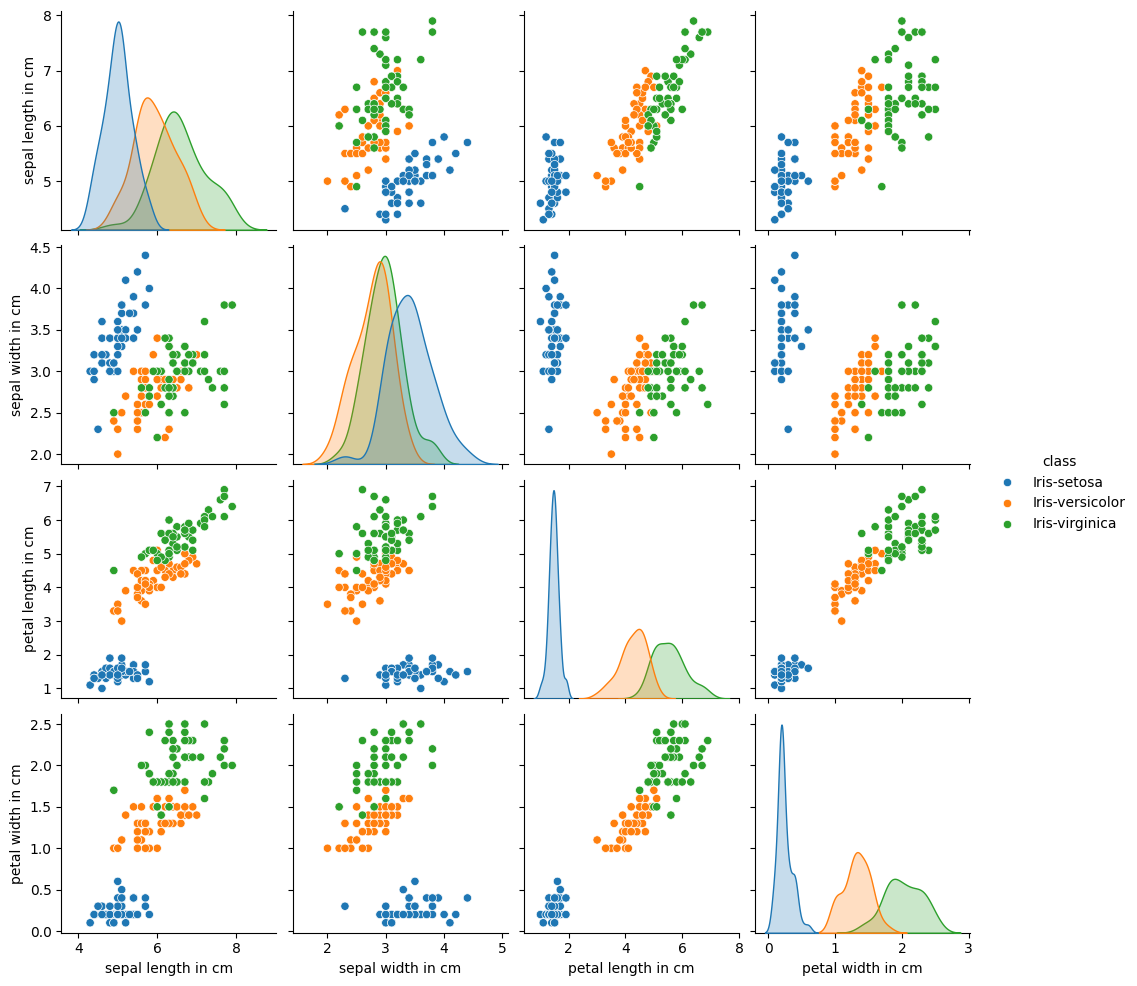

In [11]:
sns.pairplot(data, hue = "class");

## Let's show some of the iris images

In the "iris-computer-vision" folder there are images of iris that can be used for machine learning tasks.  Feel free to use any of the images to play around with.  To make things a bit easier here is the URL to one of the images: https://drive.google.com/uc?id=17e272MdEPTbGtAW7wYn8JWfJUilVV5nI

### Task

- Write a function to plot the image

Note: a combination of the "Python Image Library" (PIL), "urlopen", and Numpy will be needed to read in the URL as an array before plotting.

In [12]:
import matplotlib.pyplot as plt
import PIL
import numpy as np

image_url = 'https://drive.google.com/uc?id=17e272MdEPTbGtAW7wYn8JWfJUilVV5nI'

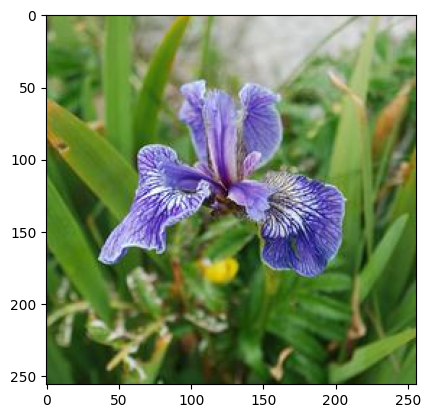

In [21]:
from PIL import Image
plt.imshow(np.array(Image.open(urlopen(image_url))));

img_array = np.array(Image.open(urlopen(image_url)))
#print(img_array)

## Augmentation

We now want to transform and augment these images to expand our dataset artificially. The most common types of augmentation are flipping, zooming, rotating, resizing, changing colour etc.

Using torch, let's do each of the transformations separately.

In [14]:
import torch
from torchvision.transforms import v2 as transforms

- Use torch to randomly resize the image. Plot the original image and the transformed image

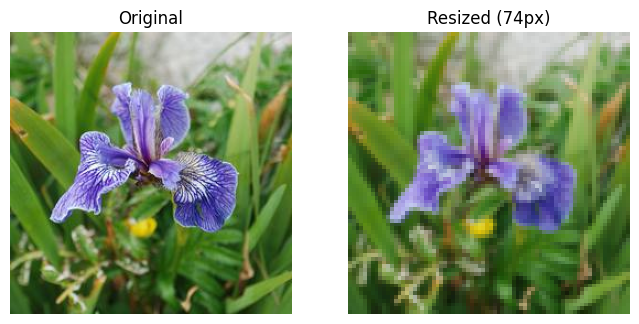

In [ ]:
import random as rand

# pick a reasonable resize in pixels
size = rand.randint(32, 256)

# Convert the NumPy array to a PIL Image before using torchvision transforms - VITAL STEP DON'T FORGET
pil_img = Image.fromarray(img_array)

# Apply resize and convert back to a NumPy array
resized_pil = transforms.Resize(size=size)(pil_img)
img_resize = np.array(resized_pil)

# Plot original and resized side-by-side
plt.figure(figsize=(8,4));
plt.subplot(1,2,1);
plt.title('Original');
plt.imshow(np.array(Image.open(urlopen(image_url))));
plt.axis('off');
plt.subplot(1,2,2);
plt.title(f'Resized ({size}px)');
plt.imshow(img_resize);
plt.axis('off');


- Use torch to horizontally flip the image. Plot the original image and the transformed image
- Use torch to vertically flip the image. Plot the original image and the transformed image

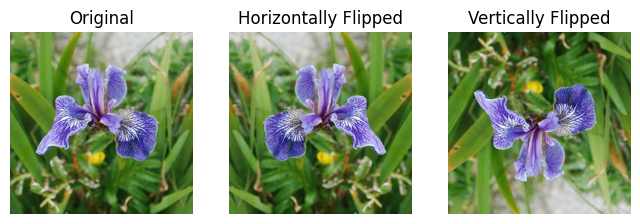

In [56]:
h_rotation = transforms.RandomHorizontalFlip(1)
v_rotation = transforms.RandomVerticalFlip(1)
h_flip_img = h_rotation(pil_img)
v_flip_img = v_rotation(pil_img)

plt.figure(figsize=(8,4));
plt.subplot(1,3,1);
plt.title('Original');
plt.imshow(np.array(Image.open(urlopen(image_url))));
plt.axis('off');
plt.subplot(1,3,2);
plt.title('Horizontally Flipped');
plt.imshow(h_flip_img);
plt.axis('off');
plt.subplot(1,3,3);
plt.title('Vertically Flipped');
plt.imshow(v_flip_img);
plt.axis('off');

- Use torch to randomly change the brightness, contrast, saturation and hue of an image. Plot the original image and the transformed image

Note: learn more at https://pytorch.org/vision/main/generated/torchvision.transforms.ColorJitter.html

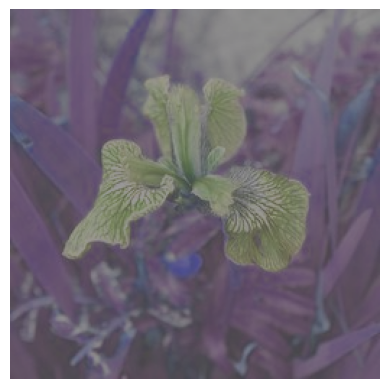

In [108]:
rand_change = transforms.ColorJitter(brightness=(0, 1), contrast=(0, 1), saturation=(0, 1), hue=(-0.5, 0.5))
rand_img = rand_change(pil_img)

plt.imshow(rand_img);
plt.axis('off');

- Use torch to randomly crop the image. Plot the original image and the transformed image

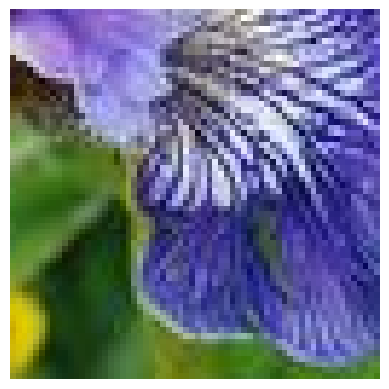

In [117]:
crop = transforms.RandomCrop(64)
cropped_img = crop(pil_img)

plt.imshow(cropped_img);
plt.axis('off');

- Use torch to randomly rotate the image by some angle. Plot the original image and the transformed image

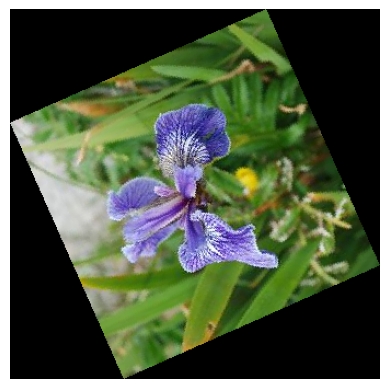

In [123]:
rotation = transforms.RandomRotation(degrees=(0, 180), expand = True)
rot_img = rotation(pil_img)

plt.imshow(rot_img);
plt.axis('off');

- Use torch to "normalize" the image. This changes the colour of the image.  Plot the original image and the transformed image

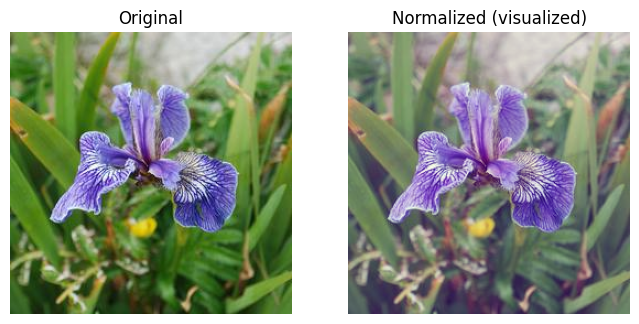

In [133]:
# Correct Normalize usage: operate on torch tensors, not raw NumPy arrays or PIL images
# Ensure we convert PIL image -> tensor (C,H,W) in range [0,1]
to_tensor = transforms.ToTensor()
tensor_img = to_tensor(pil_img)
# compute per-channel mean and std
mean = tensor_img.mean(dim=(1,2))
std = tensor_img.std(dim=(1,2))
mean_list = mean.tolist()
std_list = std.tolist()
# create Normalize with channel-wise mean/std (lists of floats)
normalise = transforms.Normalize(mean=mean_list, std=std_list)
norm_tensor = normalise(tensor_img)

# For plotting, scale normalized tensor to [0,1] so imshow can display it sensibly
norm_vis = norm_tensor.clone()
norm_vis = norm_vis - norm_vis.min()
norm_vis = norm_vis / (norm_vis.max() + 1e-8)
np_img = norm_vis.permute(1,2,0).numpy()

plt.figure(figsize=(8,4));
plt.subplot(1,2,1);
plt.title('Original');
plt.imshow(np.array(pil_img));
plt.axis('off');
plt.subplot(1,2,2);
plt.title('Normalized (visualized)');
plt.imshow(np_img);
plt.axis('off');


- In reality we don't want to do all the transformations individually like this. Write some code to perform all of the transformations in one go.

## TASK

Now, try to explore the fashionMNIST dataset

What sort of data is this?
What are the dimensions of the images?
Can you plot some of them?
How many unique labels are there?
What do the data distributions look like?
What about the pixel distributions from within the images?
Can you augmentation the images to increase the size of the dataset?

This will help to get you started with downloading the data - then you take over and explore.

In [17]:
import torch
import numpy as np
from torchvision import datasets
from torchvision.transforms import ToTensor
# Download train data from open datasets.
train_data = datasets.FashionMNIST(root='data', train=True, download=True, transform=ToTensor(),)

What does the data look like? Let's try printing a tiny bit of it.

In [134]:
print(train_data)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
